# AD&D Churn Analysis And Modeling

To:&nbsp;&nbsp;&nbsp;&nbsp; [Magnimind](https://magnimindacademy.com/)

From: Matt Curcio, matt.curcio.us@gmail.com

Date: 2022-12-27

Re:&nbsp;&nbsp;&nbsp; Churn Analysis from 10/5/2022 to 11/5/2022
<!--
https://www.kaggle.com/code/faressayah/logistic-regression-for-binary-classification-task
-->

## Logistic Regression Modeling

### Performance Metrics of the Logistic Regression Model:


| | Performance Metrics |   % |
|-| ------------------: |----:|
|1| Overall Accuracy Score | 85.13 |
|2|             Precision | 84.50 |
|3| Recall | 85.13 |
|4| F1-score | 84.80 |

---

- **Accuracy** tells us how the overall performance of the model.  


- **Precision** tells us how many of the positive predictions made by the model are correctly, and is useful for evaluating datasets where false positives are costly.  


- **Recall** tells us how many of the positive instances the model is able to identify correctly and is useful for evaluating datasets where false negatives are costly.  


- **F1-score** tells us the harmonic mean of precision and recall. It is useful for evaluating datasets where both precision and recall are important.  

--


In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SKLearn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score

print('Complete')

Complete


In [2]:
# Data setup
filename = "../data/processed/mcc_clean_churn.csv"

df = pd.read_csv(filename)

df.drop(['T_D_Min','T_E_Min','T_N_Min','T_I_Min'], axis=1, inplace=True)

df['Int_Plan'] = df['Int_Plan'].astype('category')
df['VM_Plan'] = df['VM_Plan'].astype('category')
df['Churned'] = df['Churned'].astype('category')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Act_Len        5000 non-null   int64   
 1   Int_Plan       5000 non-null   category
 2   VM_Plan        5000 non-null   category
 3   Num_VM         5000 non-null   int64   
 4   T_D_Calls      5000 non-null   int64   
 5   T_D_Charge     5000 non-null   float64 
 6   T_E_Calls      5000 non-null   int64   
 7   T_E_Charge     5000 non-null   float64 
 8   T_N_Calls      5000 non-null   int64   
 9   T_N_Charge     5000 non-null   float64 
 10  T_I_Calls      5000 non-null   int64   
 11  T_I_Charge     5000 non-null   float64 
 12  Num_Srv_Calls  5000 non-null   int64   
 13  Churned        5000 non-null   category
dtypes: category(3), float64(4), int64(7)
memory usage: 444.8 KB


In [4]:
# Function - print_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("-"*30)
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%\n")
        print(f"CLASSIFICATION REPORT:\n{clf_report}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        print("-"*30)
        
    elif train==False:
        print("-"*30)
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")       
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%\n")
        print(f"CLASSIFICATION REPORT:\n{clf_report}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        print("-"*30)

In [5]:
# Proprocessing - Splitting -> Normalization
X = df.drop(['Churned'], axis=1)
y = df['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_columns = ['Act_Len', 'Num_VM', 'T_D_Calls', 'T_D_Charge', 'T_E_Calls', 'T_E_Charge', 'T_N_Calls', 'T_N_Charge', 'T_I_Calls', 'T_I_Charge', 'Num_Srv_Calls']

ct = make_column_transformer((StandardScaler(), num_columns),remainder='drop')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [6]:
# Initial Logit modeling
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

------------------------------
Train Result:

Accuracy Score: 86.03%

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.867858    0.563218  0.860286     0.715538      0.824338
recall        0.987333    0.098000  0.860286     0.542667      0.860286
f1-score      0.923749    0.166951  0.860286     0.545350      0.815635
support    3000.000000  500.000000  0.860286  3500.000000   3500.000000

Confusion Matrix: 
 [[2962   38]
 [ 451   49]]

------------------------------
------------------------------
Test Result:

Accuracy Score: 87.07%

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.876628    0.658537  0.870667     0.767582      0.846531
recall        0.989172    0.130435  0.870667     0.559804      0.870667
f1-score      0.929506    0.217742  0.870667     0.573624      0.831282
support    1293.000000  207.000000  0.870667  1500.000000   1500.000000

Confusion Matr

Text(0.5, 1.0, 'PR Curve: precisions/recalls tradeoff')

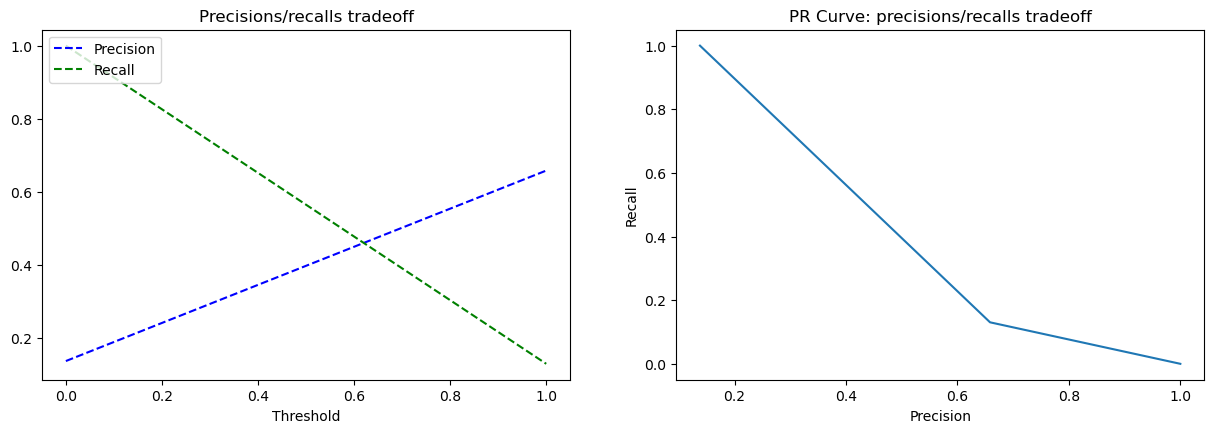

In [7]:
# Function - plot_precision_recall_vs_threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precisions/recalls tradeoff")


precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(2, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff")

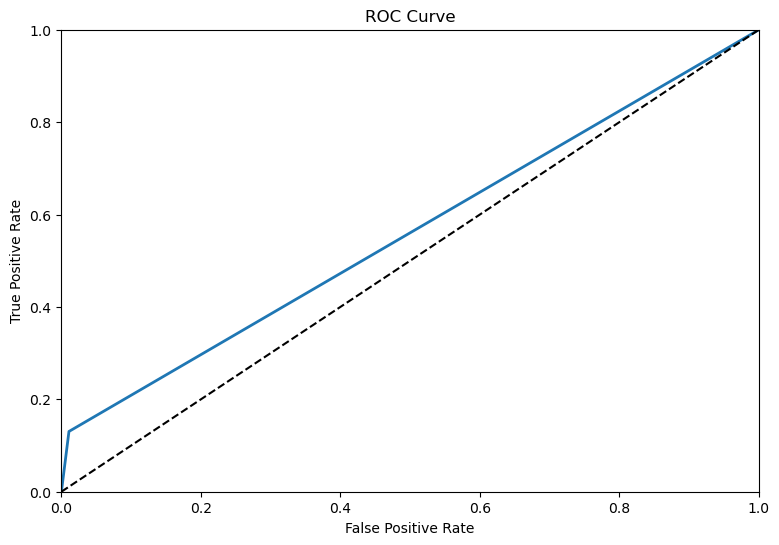

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Function 'plot_roc_curve'
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(9,6))
dataplot = plot_roc_curve(fpr, tpr)

# Save the plot as an SVG file
plt.savefig('../assets/Churn_roc_curve.svg', format='svg')

plt.show()

In [89]:
# ROC Scoring
roc_auc_score(y_test, lr_clf.predict(X_test))

0.5598036248696997

In [90]:
# Grid Search for Logit
# Parameters
penalty = ['l1', 'l2']
C = [0.1,0.3,1,3,10]
class_weight = [{1:0.3, 0:0.7}, {1:0.4, 0:0.6}, {1:0.5, 0:0.5}, 
                {1:0.6, 0:0.4},{1:0.7, 0:0.3}
                ]
solver = ['liblinear', 'saga']
lr_clf = LogisticRegression()

# Grid setup
param_grid = dict(penalty=penalty, 
                  C=C, 
                  class_weight=class_weight, 
                  solver=solver
)

lr_cv = GridSearchCV(estimator=lr_clf,
                     param_grid=param_grid,
                     scoring='f1',
                     verbose=0,
                     n_jobs=-10, 
                     cv=10
)

# Run and print results
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Best parameters: {'C': 3, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'liblinear'}
------------------------------
Train Result:

Accuracy Score: 84.06%

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.892352    0.425258  0.840571     0.658805      0.825624
recall        0.925667    0.330000  0.840571     0.627833      0.840571
f1-score      0.908704    0.371622  0.840571     0.640163      0.831978
support    3000.000000  500.000000  0.840571  3500.000000   3500.000000

Confusion Matrix: 
 [[2777  223]
 [ 335  165]]

------------------------------
------------------------------
Test Result:

Accuracy Score: 85.13%

CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.907154    0.456989  0.851333     0.682071      0.845031
recall        0.921887    0.410628  0.851333     0.666258      0.851333
f1-score      0.914461    0.432570  0.851333     0.673516  

## CLASSIFICATION REPORT of Test Results:

### 1. Overall Accuracy Score: 85.13%

### 2. Precision: 84.50%

### 3. Recall: 85.13%

### 4. F1-score: 84.80%
